In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

load_dotenv()

DB_URL = os.getenv('DATABASE_URL')

engine = create_engine(DB_URL)

df = pd.read_sql("SELECT * FROM weather_data", engine)
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Kolkata')
df.head()

,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0


In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_16nov = df[df['timestamp'].dt.date == pd.to_datetime("2025-11-16").date()].copy()
df_16nov.loc[:, 'hour'] = df_16nov['timestamp'].dt.hour

In [7]:
temp_humidity = df_16nov.groupby('hour')[['temperature','humidity']].mean().reset_index()
temp_humidity

,hour,temperature,humidity
0,0,18.700000,60.666667
1,1,18.626667,61.000000
2,2,17.506667,64.800000
3,3,17.053333,66.133333
4,4,16.726667,67.400000
5,5,16.560000,66.866667
6,7,16.693333,67.400000
7,9,20.206667,55.066667
8,10,22.640000,46.600000
9,11,24.440000,41.266667


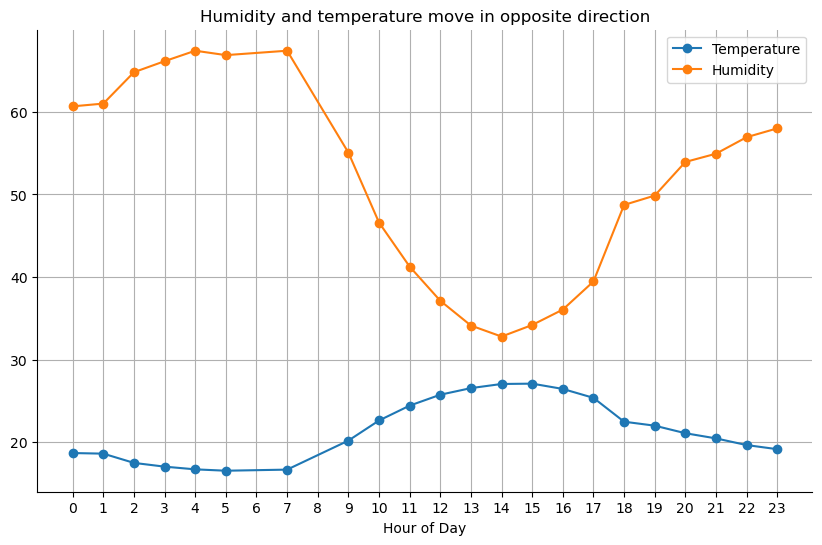

In [8]:
plt.figure(figsize=(10,6))

plt.plot(temp_humidity['hour'], temp_humidity['temperature'], marker='o', label='Temperature')
plt.plot(temp_humidity['hour'], temp_humidity['humidity'], marker='o', label='Humidity')

plt.xticks(range(0,24))

plt.xlabel("Hour of Day")
plt.ylabel("")
plt.title("Humidity and temperature move in opposite direction")
plt.grid(True)
plt.legend()
sns.despine()

plt.show()  #we dont have data for 6am and 8am 
